<a href="https://colab.research.google.com/github/theRubberDuckiee/FF/blob/main/_Main_2023_OwnersBox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pulp

In [ ]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import *
import tensorflow as tf
from statistics import median
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.constraints import MaxNorm
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools

***Week Needs Updating***

In [ ]:
# Current week in NFL
week = 5

In [ ]:
# # Bringing in all the data
df_2013 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2013/combined-wk{i}.csv")
    df_2013.append(df)
df_2013 = pd.concat(df_2013)
df_2013 = df_2013.loc[df_2013.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2014 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2014/combined-wk{i}.csv")
    df_2014.append(df)
df_2014 = pd.concat(df_2014)
df_2014 = df_2014.loc[df_2014.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2015 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2015/combined-wk{i}.csv")
    df_2015.append(df)
df_2015 = pd.concat(df_2015)
df_2015 = df_2015.loc[df_2015.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2016 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2016/combined-wk{i}.csv")
    df_2016.append(df)
df_2016 = pd.concat(df_2016)
df_2016 = df_2016.loc[df_2016.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2017 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2017/combined-wk{i}.csv")
    df_2017.append(df)
df_2017 = pd.concat(df_2017)
df_2017 = df_2017.loc[df_2017.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2018 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2018/combined-wk{i}.csv")
    df_2018.append(df)
df_2018 = pd.concat(df_2018)
df_2018 = df_2018.loc[df_2018.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2019 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2019/combined-wk{i}.csv")
    df_2019.append(df)
df_2019 = pd.concat(df_2019)
df_2019 = df_2019.loc[df_2019.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2020 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2020/combined-wk{i}.csv")
    df_2020.append(df)
df_2020 = pd.concat(df_2020)
df_2020 = df_2020.loc[df_2020.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2021 = []
for i in range(1, 19):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2021/combined-wk{i}.csv")
    df_2021.append(df)
df_2021 = pd.concat(df_2021)
df_2021 = df_2021.loc[df_2021.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2022 = []
for i in range(1, 19):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2022/combined-wk{i}.csv")
    df_2022.append(df)
df_2022 = pd.concat(df_2022)
df_2022 = df_2022.loc[df_2022.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2023 = []
for i in range(1, week):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2023/combined-wk{i}.csv")
    df_2023.append(df)
df_2023 = pd.concat(df_2023)
df_2023 = df_2023.loc[df_2023.Position.isin(['QB', 'RB', 'WR', 'TE'])]

In [ ]:
# Combining all the yearly data frames into one
df = pd.concat([df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023])
df.shape

(58846, 40)

In [ ]:
# Fill NaN values with 0.0
df = df.fillna(0.0)
# Resetting the index
df = df.reset_index(drop=True)
# This keeps all the data where the Projected Points are greather than or equal to 2
df = df[df['NewProjectedPoints'] >= 2]
# Getting the Home and Away data from Categorical to Numbers
dummies = pd.get_dummies(df.HomeAway)
# Concattenate the dummie dataframe and the main one
df = pd.concat([df, dummies], axis='columns')

Now the data will be split for training and testing

In [ ]:
# X_train is 80% of the data used for training, includes all features selected
# # X_test is 20% of the data used for testing, includes all features selected
# # y_train is 80% of the data used for training, includes the label for each row in X_train
# # y_test is 20% of the data used for testing, includes the label for each row in y_train
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Splitting the data into features and the label
X = df[['NewProjectedPoints', 'Home', 'OverUnder', 'Trend']].values
y = df[['NewActualPoints']].values

In [ ]:
# Define hyperparamters
random_seeds = []
for rs in range(1, 2):
  random_seeds.append(rs)

In [ ]:
# Lists to store performance metrics
val_loss_scores = []
best_model_paths = []
mse_loss_scores = []

Epoch 1/20
846/858 [============================>.] - ETA: 0s - loss: 102.8024
Epoch 1: val_loss improved from inf to 46.72969, saving model to best_model.h5
858/858 [==============================] - 7s 7ms/step - loss: 102.0610 - val_loss: 46.7297
Epoch 2/20
 63/858 [=>............................] - ETA: 1s - loss: 49.2074

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


858/858 [==============================] - ETA: 0s - loss: 45.8241
Epoch 2: val_loss improved from 46.72969 to 43.37346, saving model to best_model.h5
858/858 [==============================] - 4s 4ms/step - loss: 45.8241 - val_loss: 43.3735
Epoch 3/20
854/858 [============================>.] - ETA: 0s - loss: 44.6033
Epoch 3: val_loss improved from 43.37346 to 43.05076, saving model to best_model.h5
858/858 [==============================] - 5s 6ms/step - loss: 44.6177 - val_loss: 43.0508
Epoch 4/20
857/858 [============================>.] - ETA: 0s - loss: 44.3813
Epoch 4: val_loss improved from 43.05076 to 42.88874, saving model to best_model.h5
858/858 [==============================] - 8s 9ms/step - loss: 44.3903 - val_loss: 42.8887
Epoch 5/20
855/858 [============================>.] - ETA: 0s - loss: 44.2521
Epoch 5: val_loss improved from 42.88874 to 42.77342, saving model to best_model.h5
858/858 [==============================] - 5s 6ms/step - loss: 44.2699 - val_loss: 42.7734

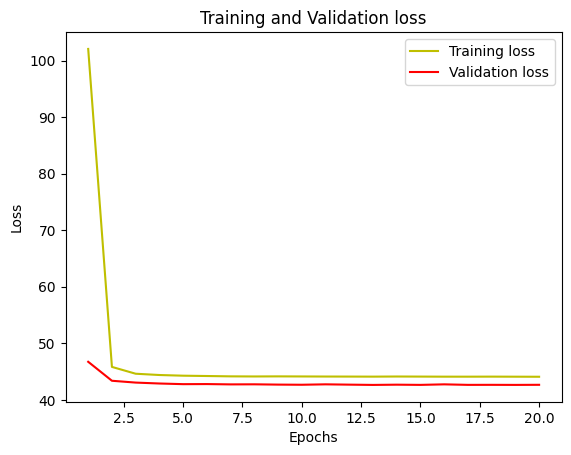




Average Validation Loss: 42.6379508972168
Variance Validation Loss: 0.0


In [ ]:
# Split the data into training and testing
for seed in random_seeds:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=True)

  # Scale both the train and test, otherwise the model will fail
  # Standardize features by removing the mean and scaling to unit variance
  scaler = StandardScaler()
  scaler.fit(X_train)

  # The new variables are being scaled based on the standardizing features that happened in X_train
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Define the model
  model = Sequential()
  # First hidden layer number of neurons and number of inputs, with the type of activation
  model.add(Dense(6, input_shape=(4,), activation='relu'))
  # Second Hidden Layer
  model.add(Dense(6, activation='relu'))
  # Output layer
  model.add(Dense(1, activation='linear'))


  # Compile the model (which defines the loss function, the optimizer, and the metrics)
  model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
  model.summary

  # Save the best model
  checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

  # Fitting the model
  history = model.fit(X_train_scaled, y_train, validation_split=0.25, epochs=20, callbacks=[checkpoint])

  # Saving the best model validation losses
  best_val_loss = min(history.history['val_loss'])
  val_loss_scores.append(best_val_loss)
  best_model = load_model('best_model.h5')
  best_model_paths.append(best_model)


  # Using the best model on the Test data now
  mse_neural = best_model.evaluate(X_test_scaled, y_test)
  print('')
  print("Iteration:", seed )
  print("Mean Squared Error from neural network: ", mse_neural)
  print("Best Validation Loss from neural network: ", best_val_loss)
  print('')
  mse_loss_scores.append(mse_neural)

  # Plot the training and validation loss at each epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  # Does a line
  plt.plot(epochs, loss, 'y', label='Training loss')
  # Does a dot
  #plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title("Training and Validation loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print('')



# Calculate average and variance of accuracy scores
average_val_loss = np.mean(val_loss_scores)
variance_val_loss = np.var(val_loss_scores)

print('')
print('')
print(f"Average Validation Loss: {average_val_loss}")
print(f"Variance Validation Loss: {variance_val_loss}")

Defining the Model

In [ ]:
# Getting the model that had the best validation loss
min_val_loss_score = min(val_loss_scores)
index_of_minimum = val_loss_scores.index(min_val_loss_score)
print(min_val_loss_score)
print(index_of_minimum)

42.6379508972168
0


In [ ]:
median_mse_loss_score = median(mse_loss_scores)
print(median_mse_loss_score)

44.352935791015625


In [ ]:
median_val_loss_score = median(val_loss_scores)
print(median_val_loss_score)

# Getting the model that is closest to the median of all results for validation loss
diff_medians = []

for i in val_loss_scores:
  diff = abs(i - median_val_loss_score)
  diff_medians.append(diff)

index_of_median = diff_medians.index(min(diff_medians))
print(index_of_median)

42.6379508972168
0


In [ ]:
# Setting the model to use with the one that had the lowest validation loss
best_model = best_model_paths[index_of_minimum]
best_model

In [ ]:
middle_model = best_model_paths[index_of_median]
middle_model

In [ ]:
# Testing the model with predictions
print('Scaled Data')
print(X_train_scaled[5])
print('')
print('X_Values')
print(X_train[5])
y_new = middle_model.predict(X_train_scaled)
print('')
print('Prediction')
print(y_new[5])
print('')
print('Actual Label')
print(y_train[5])

Scaled Data
[ 1.03302349  1.0011482   1.317174   -0.51595276]

X_Values
[15.579       1.         53.5         0.75657402]
1144/1144 [==============================] - 2s 1ms/step

Prediction
[15.268963]

Actual Label
[24.2]


In order to get a prediction, you need to have the model predict on a scaled version of the X feature(s), since the model was created on scaled data

Now that there is a model, I want it to be tested on data from a csv

In [ ]:
# Bring in the data
df_test = pd.read_csv(f"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/_Current/Current-wk{week}.csv")

The data needs to go through the same transformation as what was trained on the model

In [ ]:
# Fill NaN values with 0.0
df_test = df_test.fillna(0.0)
# This keeps all the data where the Projected Points are greather than or equal to 2
df_test = df_test[df_test['NewProjectedPoints'] >= 2]
# Getting the Home and Away data from Categorical to Numbers
dummies_test = pd.get_dummies(df_test.HomeAway)
# Concattenate the dummie dataframe and the main one
df_test = pd.concat([df_test, dummies_test], axis='columns')

In [ ]:
# Splitting the data into features
X = df_test[['NewProjectedPoints', 'Home', 'OverUnder', 'Trend']].values

In [ ]:
# Standardize the features so it matches the type of numbers that the model was trained on
scaler.fit(X)

# The new variables are being scaled based on the standardizing features that happened in X_train
X_scaled = scaler.transform(X)

In [ ]:
# # Testing the model with predictions
# print('Scaled Data')
# print(X_scaled[5])
# print('')
# print('X_Values')
# print(X[5])
# y_points = best_model.predict(X_scaled)
# print('')
# print('Prediction')
# print(y_points[5])

In [ ]:
# Testing the model with predictions
print('Scaled Data')
print(X_scaled[5])
print('')
print('X_Values')
print(X[5])
y_points = middle_model.predict(X_scaled)
print('')
print('Prediction')
print(y_points[5])

Scaled Data
[ 2.34607462  1.01212165  0.72369784 -0.46285046]

X_Values
[21.3         1.         47.5         0.87480438]
8/8 [==============================] - 0s 2ms/step

Prediction
[21.391865]


In [ ]:
# Add the new column into the dataframe
df_test = df_test.assign(NNProjectedPoints=y_points)

In [ ]:
# Changing the NewProjectedPoints column to round to 3 decimal places
decimals = 3
df_test['NNProjectedPoints'] = df_test['NNProjectedPoints'].apply(lambda x: round(x, decimals))

In [ ]:
# Creating a DataFrame with just the listed columns
df_test = df_test[['Name', 'Position', 'NNProjectedPoints', 'Salary', 'Team']]
# Eliminating rows where the Salary is equal to 0
df_test = df_test[df_test['Salary'] != 0]

In [ ]:
# This is regrouping the dataframe so the players are grouped by Position
availables = df_test.groupby(["Position", "Name", "NNProjectedPoints", "Salary", "Team"]).agg('count')
availables = availables.reset_index()

In [ ]:
# Define empty dictionaries to track the metrics for the lineup optimizer
salaries = {}
points = {}
players = {}
lineups_dict = {}
teams = {}


for position in availables.Position.unique():
    available_for_position = availables[availables.Position == position]
    players[position] = list(available_for_position.Name.values)


    salaries[position] = {
        player_roster: salary for player_roster, salary in
        zip(players[position], available_for_position.Salary.values)
    }

    points[position] = {
        player_roster: _points for player_roster, _points in
        zip(players[position], available_for_position.NNProjectedPoints.values)
    }

    teams[position] = {
    player: team for player, team in
    zip(players[position], available_for_position.Team.values)
}

# This defines another dictionary that has the positions and lineup.
positions_available = {
    "QB": 2,
    "RB": 2,
    "WR": 2,
    "TE": 1,
    "FLEX": 2
    #"SUPER": 1
}

flexible_positions = ("RB", "WR", "TE")

#superflexible_positions = ("QB", "RB", "WR", "TE")

# How much salary the starting amount is for the DFS
salary_cap = 50000


teams_available = {
    "ARI": 2,
    "ATL": 2,
    "BAL": 2,
    "BUF": 2,
    "CAR": 2,
    "CHI": 2,
    "CIN": 2,
    "CLE": 2,
    "DAL": 2,
    "DEN": 2,
    "DET": 2,
    "GB": 2,
    "HOU": 2,
    "IND": 2,
    "JAX": 2,
    "KC": 2,
    "LAC": 2,
    "LAR": 2,
    "LV": 2,
    "MIA": 2,
    "MIN": 2,
    "NE": 2,
    "NO": 2,
    "NYG": 2,
    "NYJ": 2,
    "PHI": 2,
    "PIT": 2,
    "SEA": 2,
    "SF": 2,
    "TB": 2,
    "TEN": 2,
    "WAS": 2
}

In [ ]:
variables = {position: LpVariable.dict(position, players[position], cat="Binary")
               for position in players}

In [ ]:
for position, players in variables.items():
  for player, player_selected in players.items():
    print(player_selected)

QB_Anthony_Richardson
QB_Bryce_Young
QB_CJ_Stroud
QB_Daniel_Jones
QB_Derek_Carr
QB_Desmond_Ridder
QB_Jalen_Hurts
QB_Jared_Goff
QB_Joe_Burrow
QB_Josh_Dobbs
QB_Kenny_Pickett
QB_Kirk_Cousins
QB_Lamar_Jackson
QB_Mac_Jones
QB_Matthew_Stafford
QB_Patrick_Mahomes
QB_Russell_Wilson
QB_Ryan_Tannehill
QB_Taysom_Hill
QB_Tua_Tagovailoa
QB_Zach_Wilson
RB_Alexander_Mattison
RB_Alvin_Kamara
RB_Bijan_Robinson
RB_Breece_Hall
RB_Cam_Akers
RB_Chuba_Hubbard
RB_Clyde_Edwards_Helaire
RB_D'Andre_Swift
RB_Dalvin_Cook
RB_Dameon_Pierce
RB_David_Montgomery
RB_Derrick_Henry
RB_Devin_Singletary
RB_Devon_Achane
RB_Emari_Demercado
RB_Ezekiel_Elliott
RB_Gus_Edwards
RB_Isiah_Pacheco
RB_Jahmyr_Gibbs
RB_Jaleel_McLaughlin
RB_James_Conner
RB_Javonte_Williams
RB_Jaylen_Warren
RB_Jerick_McKinnon
RB_Joe_Mixon
RB_Jonathan_Taylor
RB_Justice_Hill
RB_Keaontay_Ingram
RB_Kendre_Miller
RB_Kenneth_Gainwell
RB_Kyren_Williams
RB_Matt_Breida
RB_Michael_Carter
RB_Miles_Sanders
RB_Najee_Harris
RB_Raheem_Mostert
RB_Rhamondre_Stevenson
RB_

In [ ]:
# Putting a range of how many lineups you want created.
# Every change below the for loop of the range of lineups means each change is happening to a single lineup, that is being looped for a new one each time.
for lineup in range(1, 11):
  # Establishes the variables of the Pulp
  # a pulp variable tracks whether a player is chosen or not (binary yes/no)
  # It's a variable dictionary of keys and values

# The "problem" is we want to have the maximum salary for each lineup.
  prob = LpProblem("Fantasy", LpMaximize)

  # Creating an empty list to track rewards (points), costs (salary), and positional contraints (position)
  rewards = []
  costs = []
  number_of_selected_players = []
  team_constraints = []


  for position, players in variables.items():
    for player, player_selected in players.items():
      # If this player is selected, he will add salaries and points
        costs += salaries[position][player] * player_selected
        rewards += points[position][player] * player_selected
        number_of_selected_players += player_selected
        team_constraints += teams[position][player] * player_selected

  for position, players in variables.items():


    # Of this position, if it does not support FLEX, at most `positions_available`
    # are supported. If it does support FLEX, increment that by
    # `flexible_positions_available`
    if position not in flexible_positions:
        prob += lpSum(players.values()) == positions_available[position]  # Filling in the QB

    else:
          # We need at least `positions_available` players on this position and at
          # most`positions_available + flexible_positions_available` players
          prob += lpSum(players.values()) >= positions_available[position]  # Filling in the RB, WR, TE
          prob += (lpSum(players.values())
                          <= positions_available[position] + positions_available["FLEX"])  # Filling in the FLEX


  # This adds the costs (salary) and rewards (points) into the optimization calculation
  # This sums up the points and sums up the salary while making sure the lineup salary is less than or equal to the 50,000
  # In total, we need exactly `positions_available` players
  prob += lpSum(number_of_selected_players) == sum(positions_available.values())
  prob += lpSum(rewards)
  prob += lpSum(costs) <= salary_cap
  #prob += len(np.unique(id_constraints)) == id_unique


  num = 0.001
  # If it's not the first lineup
  if not lineup == 1:
    # Make sure the rewards (points) is less than or equal too the total of the previous lineup, minus 0.01
    # That is too ensure you don't get the same lineup each time becasue the max points of the lineup caps out
    # at just below the previous total projections. This ensures varied lineups, and then solve
    prob += (lpSum(rewards) <= total_score - num)
  prob.solve()

  # Getting the strings for the lineup and the constraints (which is same position) when starting the new lineup.
  score = str(prob.objective)
  constraints = [str(const) for const in prob.constraints.values()]

  # Creating an empty list for storing the lineup
  lineupList = []
  # This will create a list of every player in the dataset with a variable of 1 or 0, depending the player
  # has been chosen for the lineup. This loops through the list to fill in if the player has been chosen or not.
  for v in prob.variables():
      score = score.replace(v.name, str(v.varValue))
      if v.varValue != 0:
        lineupList.append(v.name)

  # # Finally we just have to save the total_score variable for the lineup.
  total_score = eval(score)
  lineupList.append(total_score)

  # # Storing all of the lineups in a dictionary
  lineups_dict.update({lineup: lineupList})

In [ ]:
# Turning the dictionary into a DataFrame
df = pd.DataFrame(lineups_dict)

In [ ]:
# Transposing the DataFrame
df = df.T

In [ ]:
# Creating a list for what the rename the column names
newcols = ['QB', 'SUPER', 'RB1', 'RB2', 'FLEXorTE', 'TEorFLEX', 'FLEX2', 'WR1', 'WR2', 'Total_Score']

In [ ]:
# Adding that column name list into the DataFrame
df.columns = newcols

In [ ]:
# Creating a list of what values to remove in each particular cell
removeKeys = ['QB_', 'RB_', 'TE_', 'WR_']
# For each position in each column, when the player has the position and _ in front of it, remove that and replace it with nothing
for pos in newcols:
  for removeKey in removeKeys:
      df[pos] = df[pos].apply(str).str.replace(removeKey,"")
  df[pos] = df[pos].apply(str).str.replace("_", " ")

In [ ]:
# Showing what the top lineups are
df.head(10)

,QB,SUPER,RB1,RB2,FLEXorTE,TEorFLEX,FLEX2,WR1,WR2,Total_Score
1,Kirk Cousins,Patrick Mahomes,Isiah Pacheco,James Conner,Zach Ertz,Justin Jefferson,Marquise Brown,Michael Wilson,Wan'Dale Robinson,137.15300000000002
2,Jalen Hurts,Tua Tagovailoa,Isiah Pacheco,James Conner,Zach Ertz,Justin Jefferson,Marquise Brown,Michael Wilson,Wan'Dale Robinson,136.916
3,Patrick Mahomes,Tua Tagovailoa,Isiah Pacheco,James Conner,Zach Ertz,Marquise Brown,Michael Wilson,Tyreek Hill,Wan'Dale Robinson,136.899
4,Anthony Richardson,Patrick Mahomes,Isiah Pacheco,James Conner,Zach Ertz,Justin Jefferson,Marquise Brown,Michael Wilson,Wan'Dale Robinson,136.85899999999998
5,Jalen Hurts,Matthew Stafford,Isiah Pacheco,James Conner,Sam LaPorta,Zach Ertz,Justin Jefferson,Marquise Brown,Wan'Dale Robinson,136.79700000000003
6,Matthew Stafford,Patrick Mahomes,Alvin Kamara,Isiah Pacheco,Zach Ertz,Adam Thielen,Justin Jefferson,Michael Wilson,Wan'Dale Robinson,136.744
7,Jalen Hurts,Kirk Cousins,D'Andre Swift,Isiah Pacheco,Zach Ertz,Justin Jefferson,Marquise Brown,Michael Wilson,Wan'Dale Robinson,136.74200000000002
8,Jalen Hurts,Patrick Mahomes,Dameon Pierce,James Conner,Zach Ertz,Marquise Brown,Michael Wilson,Tyreek Hill,Wan'Dale Robinson,136.71
9,Matthew Stafford,Patrick Mahomes,D'Andre Swift,Joe Mixon,Zach Ertz,Justin Jefferson,Marquise Brown,Michael Wilson,Wan'Dale Robinson,136.67700000000002
10,Jalen Hurts,Matthew Stafford,Isiah Pacheco,James Conner,Sam LaPorta,Justin Jefferson,Marquise Brown,Michael Wilson,Wan'Dale Robinson,136.675


In [ ]:
# df.to_csv('FF_Data_Wk5.csv', encoding = 'utf-8-sig', index=False)
# files.download('FF_Data_Wk5.csv')